In [1]:
from skimage.feature import peak_local_max
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy.signal import convolve2d

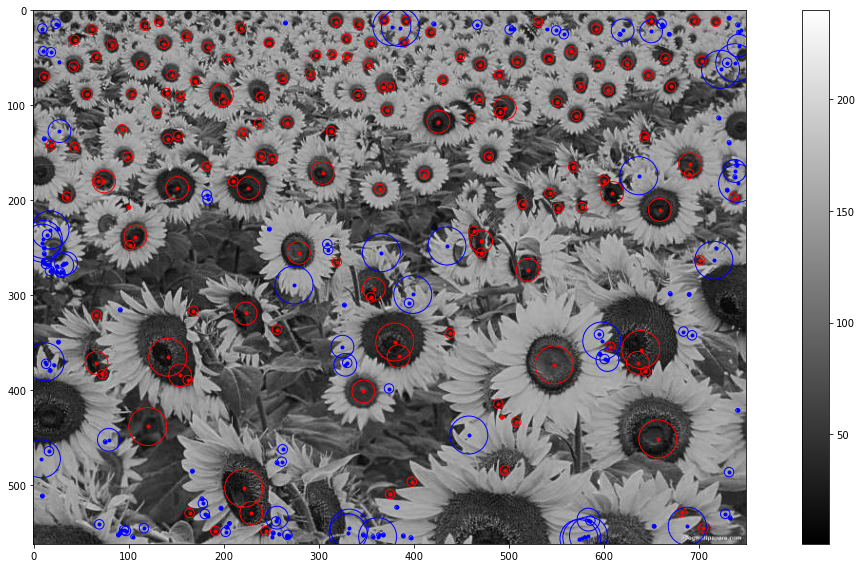

In [2]:
# 2.3
import numpy as np

def Ixx(x, y, tau, sigma):
    return (x**2-tau**2-sigma**2)*np.exp(-(x**2+y**2)/(2*(tau**2+sigma**2)))/(2*np.pi*(tau**2+sigma**2)**3)

def Iyy(x, y, tau, sigma):
    return (y**2-tau**2-sigma**2)*np.exp(-(x**2+y**2)/(2*(tau**2+sigma**2)))/(2*np.pi*(tau**2+sigma**2)**3)

def H(x, y, tau, sigma=1.0):
    return tau**2*(Ixx(x,y,tau,sigma)+Iyy(x,y,tau,sigma))

def H_kerel(img, tau, sigma=1.0):
    x = np.arange(np.ceil(-img.shape[0]/2), np.ceil(img.shape[0]/2))
    y = np.arange(np.ceil(-img.shape[1]/2), np.ceil(img.shape[1]/2))
    xx, yy = np.meshgrid(x, y)
    return H(xx, yy, tau, sigma)

def find_local_extrema(img_conv, extrema=1):
    coor_local_max = peak_local_max(extrema * img_conv, 
                                    min_distance=1)
    local_max = []
    for i in range(len(coor_local_max)):
        local_max.append(img_conv[coor_local_max[i, 0], coor_local_max[i, 1]])

    arr = np.zeros((len(local_max), 3))
    arr[:, 0:2] = coor_local_max
    arr[:, 2] = local_max
    return arr

def H_tau_arr(I, tau_arr):
    count = 0
    x, y = I.shape
    H_img = np.zeros((x, y, len(tau_arr)))
    for tau in tau_arr:
        dum_ker = np.zeros((int(tau*5), int(tau*5)))
        img_conv = convolve2d(I, H_kerel(dum_ker, tau), mode='same')
        H_img[:,:,count] = img_conv
        count += 1
    H_img_max = np.max(H_img, axis=2)
    ind = np.argmax(H_img, axis=2)
    return (H_img_max, ind)

sunflower = imread('sunflower.tiff', as_gray=True)
tau_arr = [1, 2, 5, 12, 20]
img_conv, ind = H_tau_arr(sunflower, tau_arr)
coor_max = find_local_extrema(img_conv, 1)
coor_min = find_local_extrema(img_conv, -1)
n_points = 150

fig, ax = plt.subplots(figsize=(16, 8))
im = ax.imshow(sunflower, cmap="gray")
ax.plot(coor_max[:n_points, 1], coor_max[:n_points, 0], 'r.')
for i in range(n_points):
    circle_max = plt.Circle((coor_max[i, 1], coor_max[i, 0]), 
                    tau_arr[ind[int(coor_max[i, 0]), int(coor_max[i, 1])]],
                    color='r',
                    fill = False)
    ax.add_artist(circle_max)
ax.plot(coor_min[:n_points, 1], coor_min[:n_points, 0], 'b.')
for i in range(n_points):
    circle_max = plt.Circle((coor_min[i, 1], coor_min[i, 0]), 
                    tau_arr[ind[int(coor_min[i, 0]), int(coor_min[i, 1])]],
                    color='b',
                    fill = False)
    ax.add_artist(circle_max)
fig.colorbar(im)
plt.tight_layout()